# The Euro Problem

When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. "It looks very suspicious to me" said BB, a stats lecturer at LSE. "If the coin were unbiased the chance of getting a result as exteme as that would be less than 7%"

Does this data give evidence that the coin is biased rather than fair?

Define 101 hypetheses, where $H_x$ is the hypothesis that the prob. of heads is x% for values from 0 to 100. Let the priors be uniform. 

Create a liklihood function

In [1]:
# Import packages
from thinkbayes2 import Suite
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

For each probability that a coin lands on heads v tails, we want to see that the probability of this outcome is.

So, we want to develop a suite that takes in a vector with 100 components, each component being the liklihood for the coins bias from 0% heads to 100% heads.

So, if we have a hypothesis of 50%, the likelihood of drawing H is 0.5 and T is 0.5, and so on. When we create our Euro class, all of these hypotheses are created.

When we update our dataset based on our data, we are trying to see how likely that result is given our hypotheses.

In [2]:
# Define Euro object
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x/100
        else:
            return 1- x/100

In [3]:
suite = Euro(range(0, 101))
dataset = 'H' * 140 + 'T' * 110

In [4]:
for data in dataset:
    suite.Update(data)

In [5]:
# Get Data to plot result
x = []
y = []

for hypothesis, probability in suite.Items():
    x.append(hypothesis)
    y.append(probability)

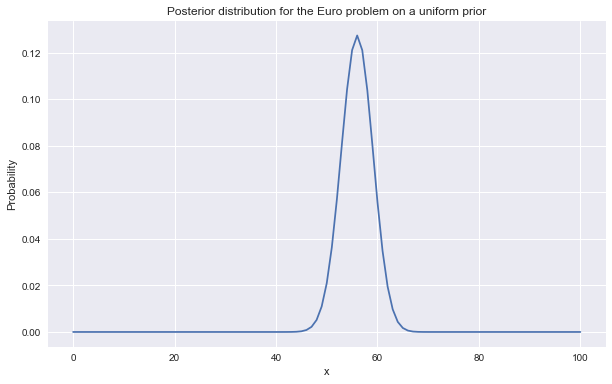

In [6]:
# Plot the result
fix, ax = plt.subplots(figsize=(10, 6), facecolor='white', edgecolor='k')
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Posterior distribution for the Euro problem on a uniform prior")
plt.show()

In [7]:
suite.CredibleInterval()

(51, 61)

Posterior is a bell curve slightly above 50%, with a max. liklihood of 56%, mean of 55.95% and CI of (51, 61).

Note that 50% is just outside of the CI but the number of hypothesis was arbitrary. Note as well that our priors don't make that much sesne, since the result isnt as obviously skewed as 1% or 99%.

In [8]:
suite2 = Euro()
for i in range(0, 51):
    suite2.Set(i, i)
for i in range(51, 101):
    suite2.Set(i, 100-i)
suite2.Normalize()

for data in dataset:
    suite2.Update(data)

In [9]:
# Get Data to plot result
x_2 = []
y_2 = []

for hypothesis, probability in suite2.Items():
    x_2.append(hypothesis)
    y_2.append(probability)

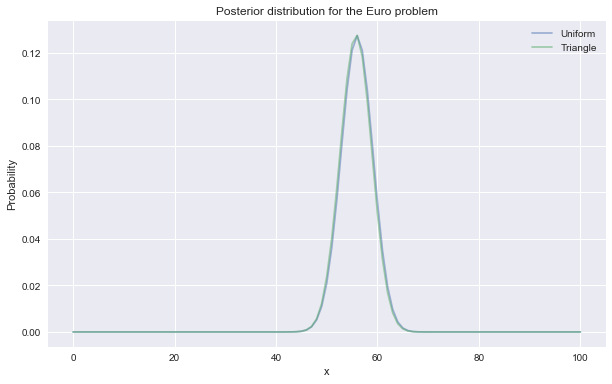

In [10]:
# Plot the result
fix, ax = plt.subplots(figsize=(10, 6), facecolor='white', edgecolor='k')
plt.plot(x, y, label='Uniform', alpha=0.5)
plt.plot(x_2, y_2, label='Triangle', alpha=0.5)
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Posterior distribution for the Euro problem")
plt.legend()
plt.show()

We can see that changing the priors in this instance doesnt change the data very much. This is because the data does enough to swamp out the priors and converges on the same bell curve as before.

This shows that even if we start with different priors, it's possible to come to the same conclusions if there is enough data.